In [1]:
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../2.Analyse_Exploratoire/data_multivariate.csv")

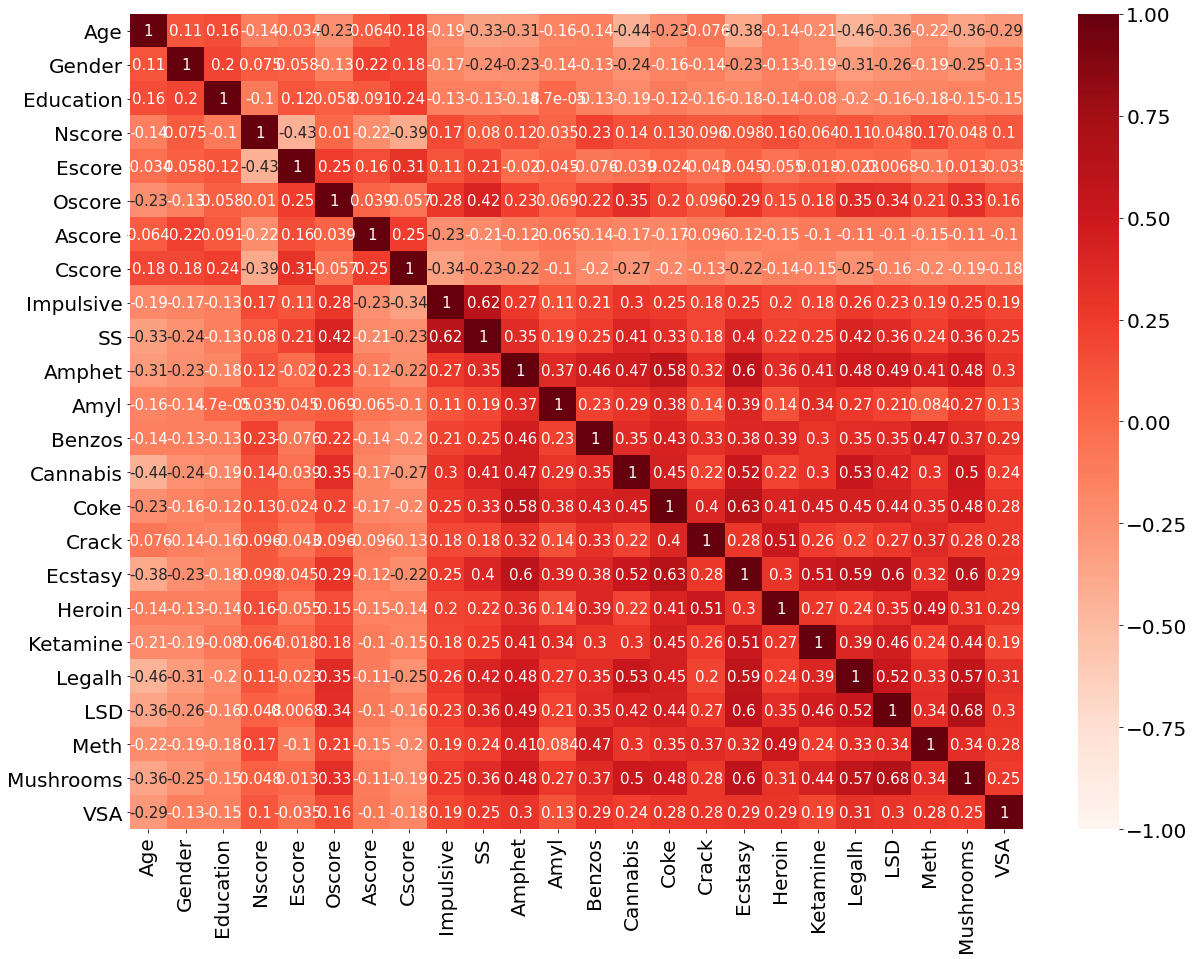

In [3]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1, 1, figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, ax=ax, cmap=plt.cm.Reds)
plt.show()


Let's reduce this matrix, Age to Cscore don't seems to show any correlation

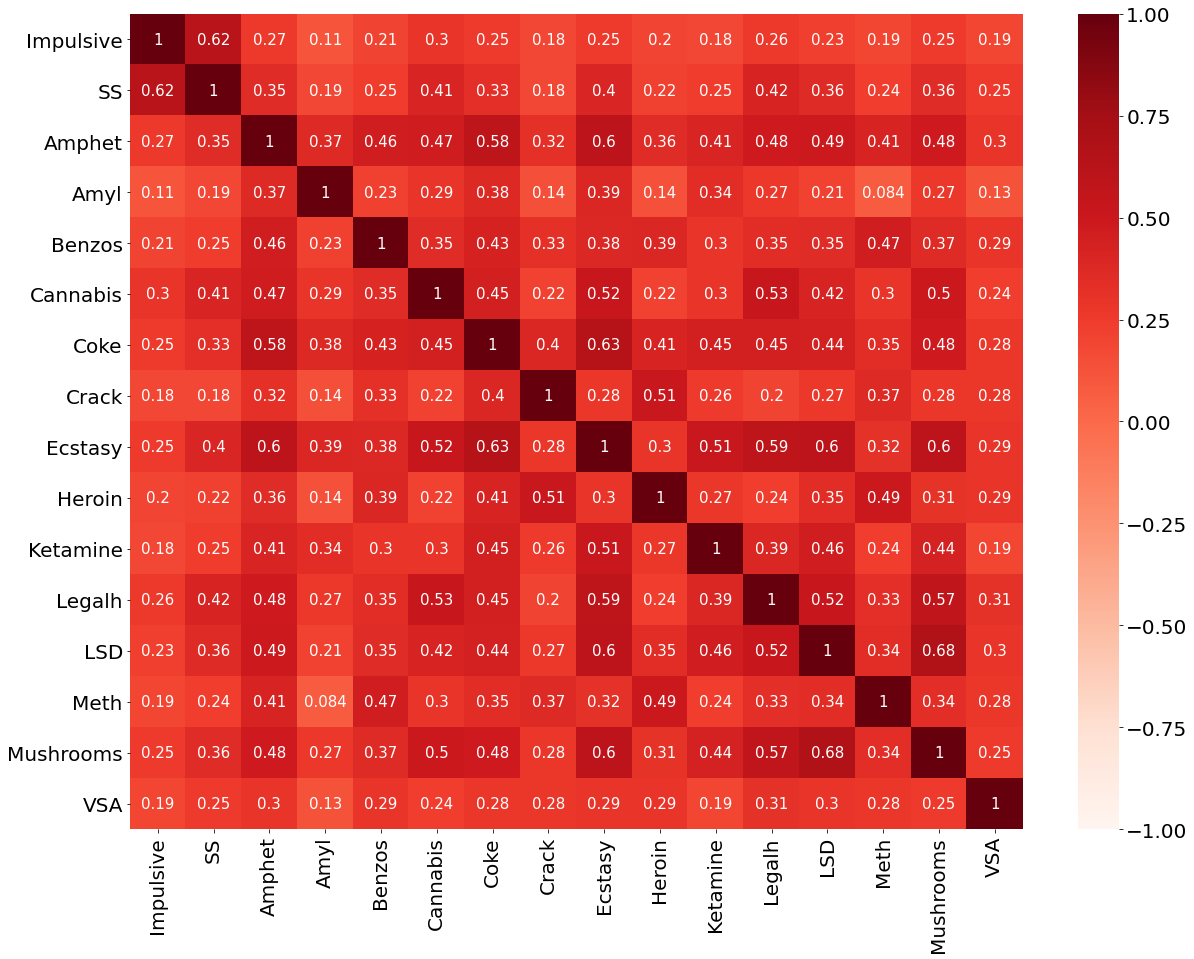

In [4]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1, 1, figsize=(20,15))
sns.heatmap(df.drop(["Age","Gender","Education","Nscore","Escore","Oscore","Ascore","Cscore"], axis = 1).corr(), vmin=-1, vmax=1, annot=True, ax=ax, cmap=plt.cm.Reds)
plt.show()

## Removing correlation

Impulsive and SS seems to be correlated, but SS seems to have a bigger impact on classification (cf First Analysis and have a better correlation with the target cf Multivariate analysis), therefore we remove Impulsive

In [5]:
del df["Impulsive"]

- Amyl and Benzos don't show big correlation with other variables (highest of 0.47 with Meth for Benzos)
- On the other hand, cannabis is correlated more that 0.5 percent with Ecstasy, LegalH, Mushrooms and nicotine
- Coke is higly correlated with Ecstasy and Amphet
- Crack get a correlation with Heroin, which make sense due to crack composition (Solid Heroin)
- Ecstasy is correlated with many drugs
- Heroin with crack only
- Ketamine with Ecstasy
- Legal High with many
- LSD with legal High and mushrooms and ecstasy
- Meth not correlated
- Mushrooms with many
- nicotine, only cannabis
- VSA, no correlation

#### Conclusion
We see the group of Ecstasy, Legal High, mushrooms with many correlation so we can delete them. We have to choose between heroin and crack and heroin seems to have a greater impact than crack. Between coke and amphet it is better to choose amphet

In [6]:
df.drop(["Ecstasy", "Mushrooms","Legalh","Crack","Coke"], axis = 1, inplace = True)

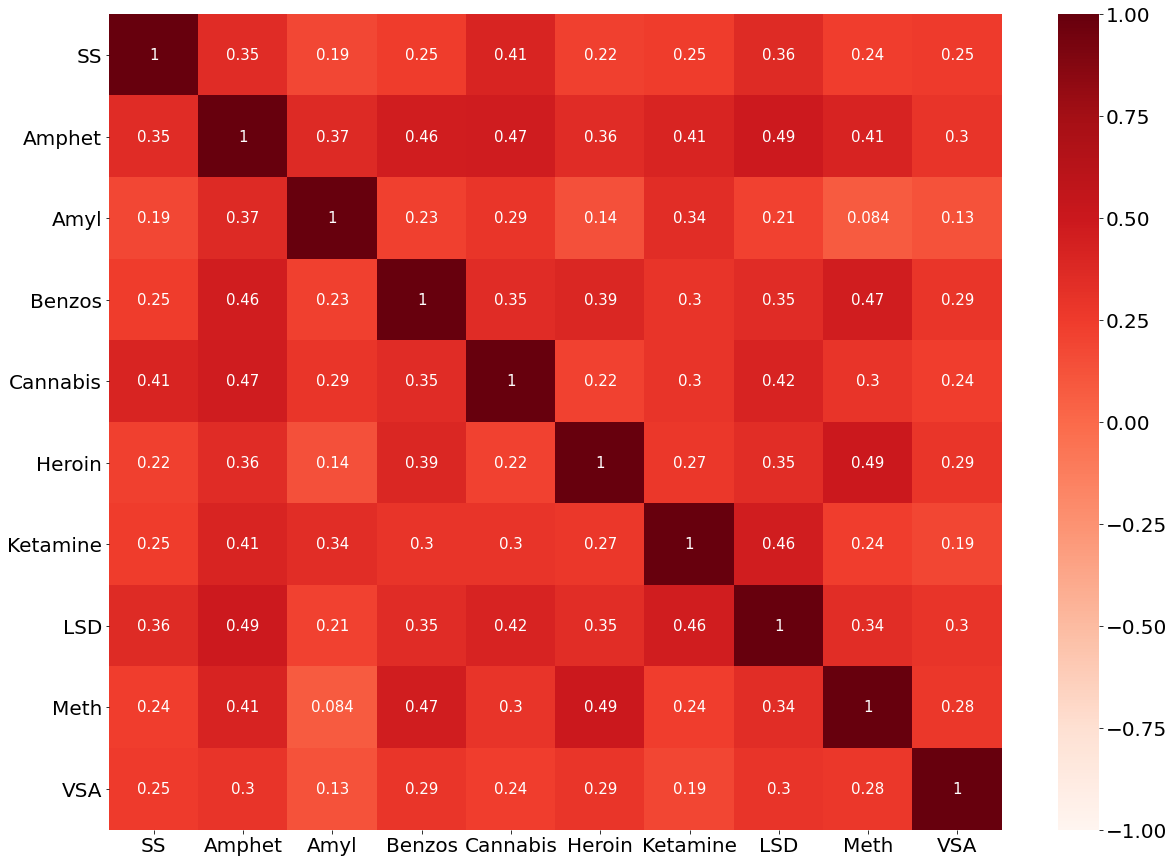

In [7]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1, 1, figsize=(20,15))
sns.heatmap(df.drop(["Age","Gender","Education","Nscore","Escore","Oscore","Ascore","Cscore"], axis = 1).corr(), vmin=-1, vmax=1, annot=True, ax=ax, cmap=plt.cm.Reds)
plt.show()

In [8]:
df

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,SS,Amphet,Amyl,Benzos,Cannabis,Heroin,Ketamine,LSD,Meth,VSA,Addiction
0,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-1.18084,1,0,1,0,0,0,0,0,0,No Addiction
1,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.21575,1,1,0,1,0,1,1,1,0,Addiction without psychologic effect
2,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,0.40148,0,0,0,1,0,0,0,0,0,No Addiction
3,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.18084,0,0,1,1,0,1,0,0,0,No Addiction
4,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21575,0,0,0,1,0,0,0,0,0,No Addiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,1.92173,0,0,0,1,0,0,1,0,1,Addiction without psychologic effect
1881,-0.95197,-0.48246,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.76540,0,0,0,1,0,0,1,1,0,Addiction without psychologic effect
1882,-0.07854,0.48246,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,-0.52593,1,1,1,1,0,1,1,0,0,Addiction with psychologic effect
1883,-0.95197,0.48246,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.22470,0,0,0,1,0,0,1,0,0,Addiction with psychologic effect


In [9]:
df.shape

(1885, 19)

In [10]:
df.to_csv("../Models/data_tofit.csv", index = False)

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b